In [1]:
# Things to do 
# We will use the feedforward neural network to classify the MNIST dataset
# Tutorial: https://www.youtube.com/watch?v=ixathu7U-LQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=3

# Import the libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform= transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform= transforms.ToTensor(), download=True)

# loading the data
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [6]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


torch.Size([100, 1, 28, 28]) torch.Size([100])
-> 100; # samples in the batch
-> 1; # of channels in the images, since black and white it has one.
-> 28 x 28; images size

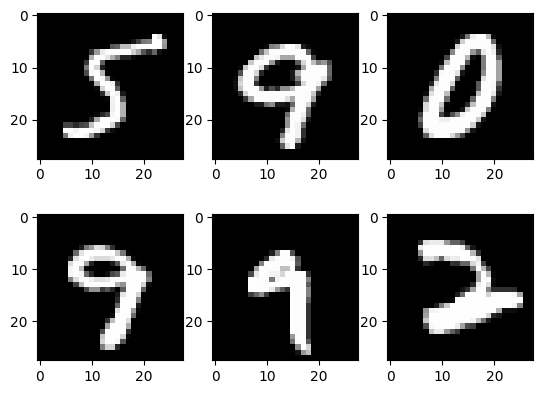

In [7]:
# printing the first few images

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) # input layer
        self.relu = nn.ReLU() # activation function
        self.l2 = nn.Linear(hidden_size, num_classes) # hidden layer
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out
    

In [10]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
# Setting a custom plotting style
plt.style.use('seaborn-darkgrid')

n_total_steps = len(train_loader)
losses = []  # to store the losses

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            
        losses.append(loss.item())

C:\Users\hp\AppData\Local\Temp\ipykernel_1476\1544541637.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


epoch 1/2, step 100/600, loss = 0.0638
epoch 1/2, step 200/600, loss = 0.2281
epoch 1/2, step 300/600, loss = 0.1758
epoch 1/2, step 400/600, loss = 0.1594
epoch 1/2, step 500/600, loss = 0.1142
epoch 1/2, step 600/600, loss = 0.0873
epoch 2/2, step 100/600, loss = 0.0535
epoch 2/2, step 200/600, loss = 0.1119
epoch 2/2, step 300/600, loss = 0.1579
epoch 2/2, step 400/600, loss = 0.0606
epoch 2/2, step 500/600, loss = 0.0813
epoch 2/2, step 600/600, loss = 0.0210


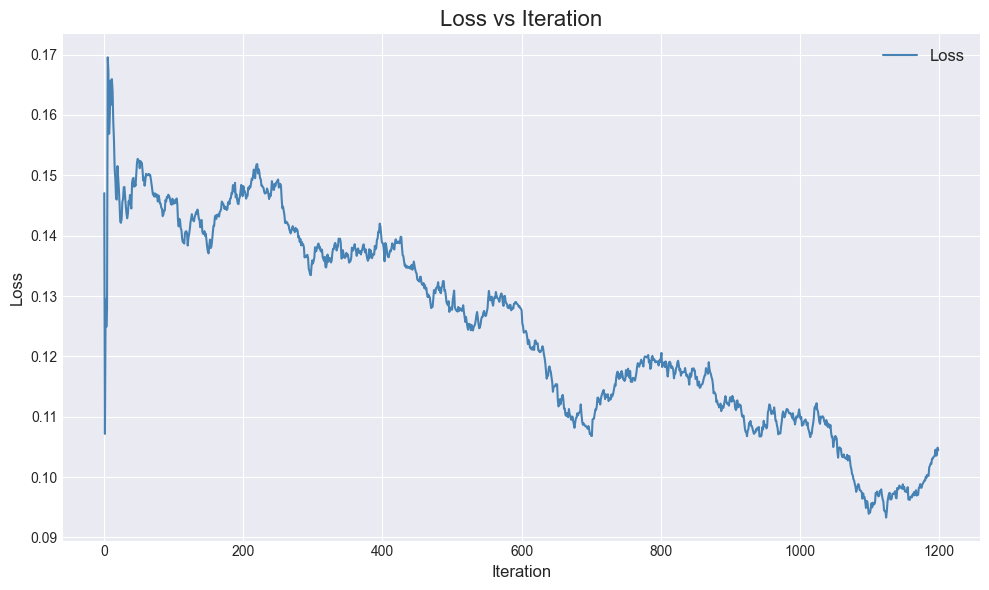

In [14]:
# Plotting the loss
plt.figure(figsize=(10, 6))  # figure size

# Smoothing the loss curve using a moving average
window_size = 100
smoothed_losses = [sum(losses[i-window_size:i])/window_size if i >= window_size else sum(losses[:i+1])/(i+1) for i in range(len(losses))]

# smoothed loss curve
plt.plot(smoothed_losses, linewidth=1.5, color='steelblue', label='Loss')

plt.title('Loss vs Iteration', fontsize=16) 
plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.tight_layout()  
plt.savefig('loss.pdf')
plt.show()

In [12]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
acc = 100.0 * n_correct / n_samples
print(f'accuracy = {acc}')

accuracy = 95.57
